In [4]:
# 라이브러리 불러오기
import time
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as bs

In [5]:
# 폰트 설정
import matplotlib.pyplot as plt

def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [6]:
font_family = get_font_family()

/var/folders/kd/wh5__hs12zb40t3r3stb8yhr0000gn/T/ipykernel_56966/3838383377.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


<AxesSubplot:title={'center':'한글'}>

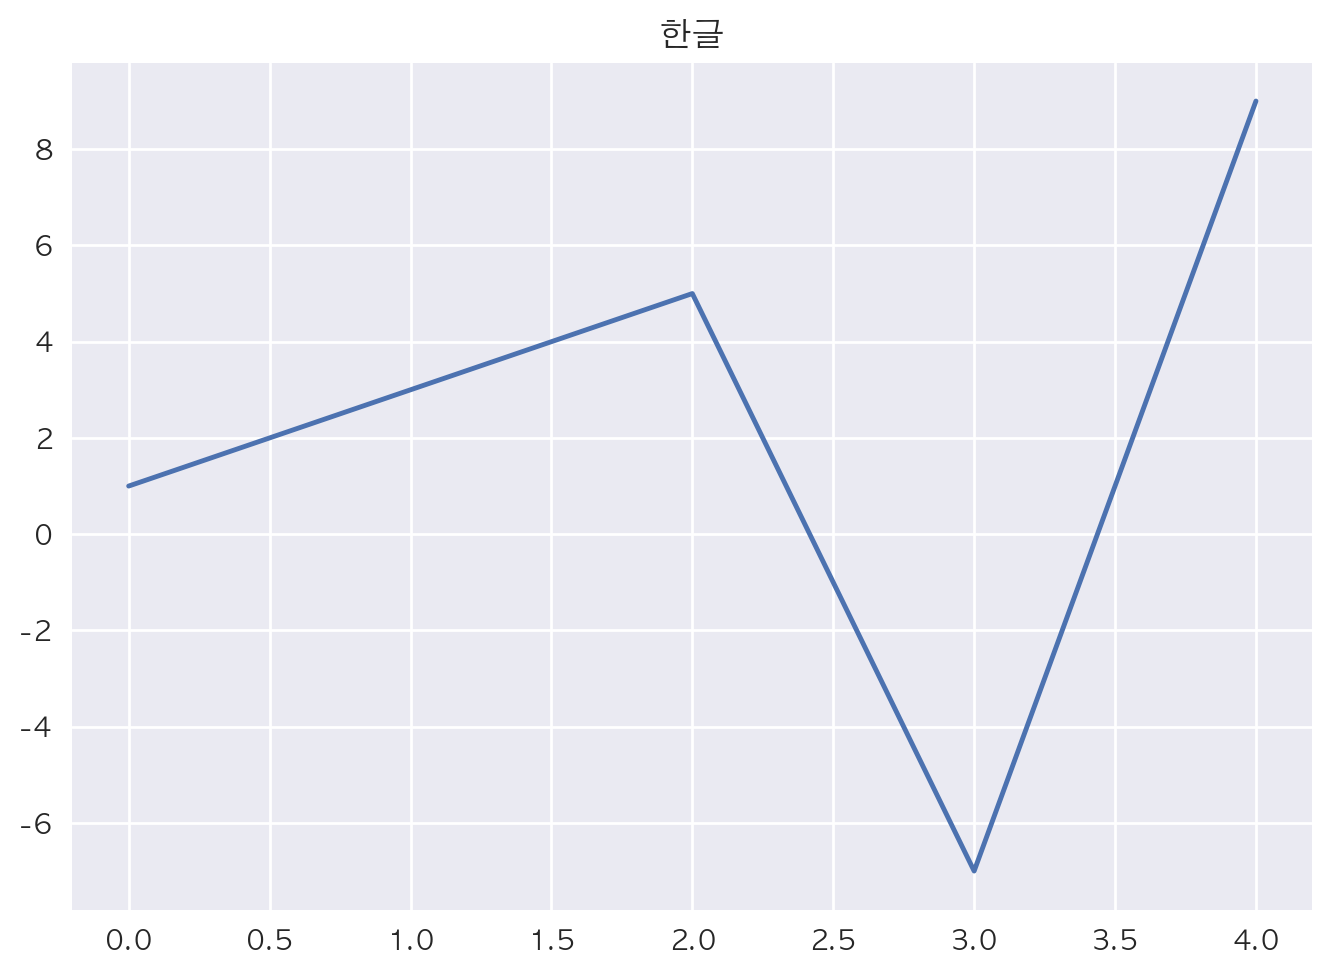

In [7]:
# 그래프 스타일 설정
plt.style.use("seaborn")

# 폰트설정
plt.rc("font", family=font_family)

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# 한글폰트가 제대로 동작하는지 확인하기
pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

In [136]:
#셀렉터로 찾은 것(#contentarea_left > table > tbody > tr:nth-child(4) > td:nth-child(1) > a)을 바로 넣었는데 안되었음 ㅠ ㅠ
soup.select('tr > td > a')

[<a href="/sise/sise_group_detail.naver?type=upjong&amp;no=323">해운사</a>,
 <a href="/sise/sise_group_detail.naver?type=upjong&amp;no=287">소프트웨어</a>,
 <a href="/sise/sise_group_detail.naver?type=upjong&amp;no=327">디스플레이패널</a>,
 <a href="/sise/sise_group_detail.naver?type=upjong&amp;no=291">조선</a>,
 <a href="/sise/sise_group_detail.naver?type=upjong&amp;no=266">화장품</a>,
 <a href="/sise/sise_group_detail.naver?type=upjong&amp;no=300">양방향미디어와서비스</a>,
 <a href="/sise/sise_group_detail.naver?type=upjong&amp;no=313">석유와가스</a>,
 <a href="/sise/sise_group_detail.naver?type=upjong&amp;no=333">무선통신서비스</a>,
 <a href="/sise/sise_group_detail.naver?type=upjong&amp;no=305">항공사</a>,
 <a href="/sise/sise_group_detail.naver?type=upjong&amp;no=337">카드</a>,
 <a href="/sise/sise_group_detail.naver?type=upjong&amp;no=330">생명보험</a>,
 <a href="/sise/sise_group_detail.naver?type=upjong&amp;no=299">기계</a>,
 <a href="/sise/sise_group_detail.naver?type=upjong&amp;no=276">복합기업</a>,
 <a href="/sise/sise_group_detail

In [59]:
# 업종별 시세 목록을 추출
url = 'https://finance.naver.com/sise/sise_group.naver?type=upjong'
content = pd.read_html(url, encoding = 'cp949')
df = content[0]

#결측치 제거
df = df.dropna()

#인덱스 새로 부여
df.reset_index(drop = True, inplace = True)

# 업종번호 넘버링
req = requests.get(url)
html = req.text
soup = bs(html, 'html.parser')

num = []
for i in range(len(df)):
    num.append(soup.select('tr > td > a')[i]["href"].split("=")[-1])
    i+=1
df["업종번호"] = num

# 컬럼수정
df.columns = ['업종명', '전일대비', '전일대비 등락현황 전체', '전일대비 등락현황 상승', '전일대비 등락현황 보합', '전일대비 등락현황 하락', 
              '등락그래프', '업종번호']   
df

/var/folders/kd/wh5__hs12zb40t3r3stb8yhr0000gn/T/ipykernel_56966/3301489326.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["업종번호"] = num


,업종명,전일대비,전일대비 등락현황 전체,전일대비 등락현황 상승,전일대비 등락현황 보합,전일대비 등락현황 하락,등락그래프,업종번호
0,해운사,+5.71%,9.0,6.0,0.0,3.0,100%,323
1,소프트웨어,+4.32%,63.0,52.0,2.0,9.0,75%,287
2,디스플레이패널,+4.09%,4.0,2.0,0.0,2.0,71%,327
3,조선,+3.23%,24.0,20.0,1.0,3.0,56%,291
4,화장품,+2.90%,53.0,38.0,4.0,11.0,50%,266
...,...,...,...,...,...,...,...,...
74,부동산,-0.90%,25.0,5.0,0.0,20.0,15%,280
75,전문소매,-1.15%,6.0,4.0,1.0,1.0,20%,328
76,자동차부품,-1.16%,142.0,73.0,5.0,64.0,20%,270
77,복합유틸리티,-1.27%,1.0,0.0,0.0,1.0,22%,331


ValueError: shape mismatch: objects cannot be broadcast to a single shape

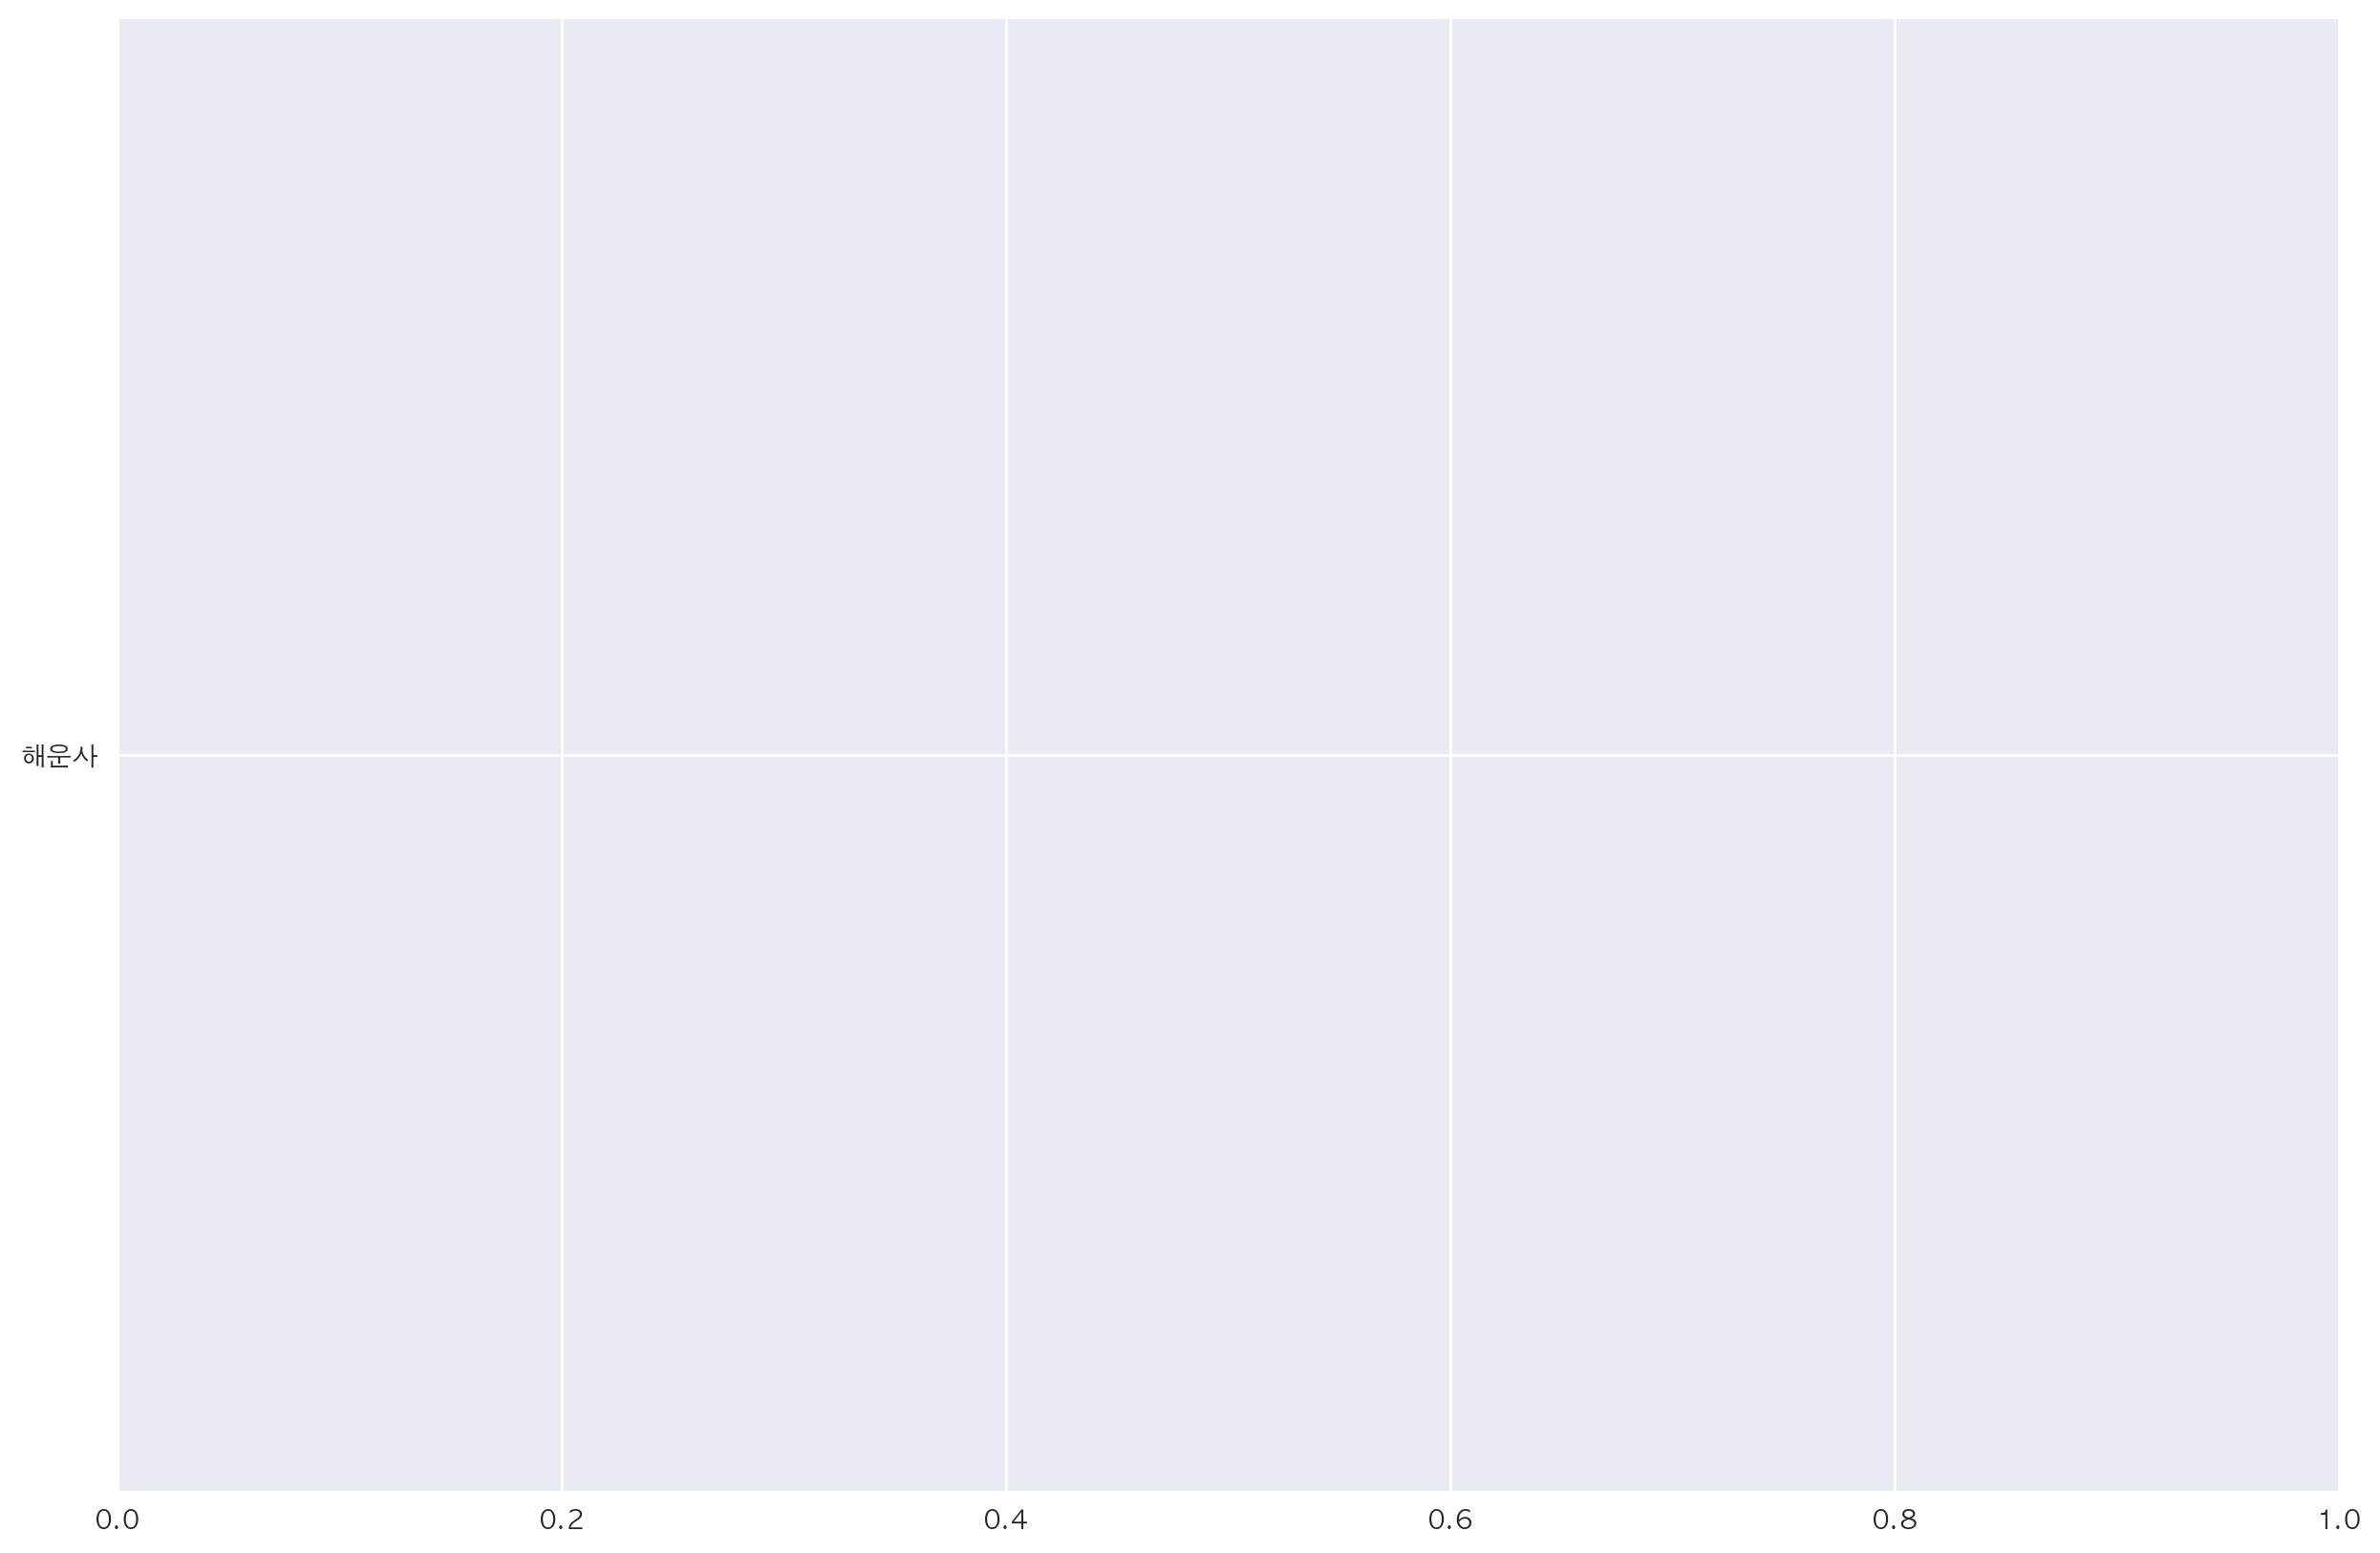

In [23]:
# 업종명 별 등락그래프를 bar chart로 만들어보기 (실패)
fig, ax = plt.subplots()

# 피규어 크기
fig.set_size_inches(15,10)

# 그래프 뒤에 그리드 그리기
ax.set_axisbelow(True)
x = np.arange(3)
plt.bar(x, df["업종명"])
plt.xticks(x, df["등락그래프"])
plt.title('업종별 등락그래프')
plt.legend(fontsize = 20)
# temp = df[["업종명", "등락그래프"]]
# temp.set_index("등락그래프").tail(30).plot.bar()

In [60]:
link_no = df["업종번호"]

In [61]:
# 업종별 세부 내용 수집 함수

def content_detail(df_no):
    url_detail = f'https://finance.naver.com/sise/sise_group_detail.naver?type=upjong&no={df_no}'
    table = pd.read_html(url_detail, encoding ="cp949")

    # 전처리 : table[2]에 데이터 있고, 결측치 제거 필요
    data = table[2]
    data = data.dropna(how="all").dropna(axis=1, how='all')

    return data

In [98]:
# 업종별 소프트웨어 세부내용 전체

list_tmp_df = []
for i in range (len(df)):
    data_detail = content_detail(df["업종번호"][i])
    data_detail.insert(0, '업종명', df["업종명"][i])
    list_tmp_df.append(data_detail)

df_total = pd.concat(list_tmp_df, ignore_index=True)
df_total

,업종명,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량
0,해운사,HMM,23300.0,1500.0,+6.88%,23250.0,23300.0,11953472.0,279793.0,1545217.0
1,해운사,대한해운,2280.0,125.0,+5.80%,2280.0,2285.0,10296856.0,24046.0,745736.0
2,해운사,흥아해운,1498.0,79.0,+5.57%,1497.0,1498.0,8600438.0,13683.0,211169.0
3,해운사,팬오션,6120.0,170.0,+2.86%,6120.0,6130.0,7029879.0,43459.0,3131221.0
4,해운사,웰바이오텍,1058.0,4.0,+0.38%,1055.0,1058.0,165359.0,175.0,185173.0
...,...,...,...,...,...,...,...,...,...,...
3719,자동차부품,태양금속우,3135.0,155.0,-4.71%,3130.0,3135.0,119884.0,377.0,191734.0
3720,자동차부품,한주라이트메탈 *,5870.0,430.0,-6.83%,5870.0,5880.0,4005206.0,23888.0,9175945.0
3721,자동차부품,구영테크 *,2645.0,270.0,-9.26%,2645.0,2650.0,1094668.0,2930.0,1919287.0
3722,복합유틸리티,지역난방공사,31150.0,400.0,-1.27%,31050.0,31150.0,5793.0,180.0,4331.0


In [99]:
# 저장할 파일명 지정
file_name = 'data/scrapping_finance_upjong.csv'

In [100]:
# csv 파일로 저장합니다.
df_total.to_csv(file_name, index=False)

In [101]:
# 저장이 잘 되었는지 csv 파일로 읽어옵니다.
pd.read_csv(file_name)

,업종명,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량
0,해운사,HMM,23300.0,1500.0,+6.88%,23250.0,23300.0,11953472.0,279793.0,1545217.0
1,해운사,대한해운,2280.0,125.0,+5.80%,2280.0,2285.0,10296856.0,24046.0,745736.0
2,해운사,흥아해운,1498.0,79.0,+5.57%,1497.0,1498.0,8600438.0,13683.0,211169.0
3,해운사,팬오션,6120.0,170.0,+2.86%,6120.0,6130.0,7029879.0,43459.0,3131221.0
4,해운사,웰바이오텍,1058.0,4.0,+0.38%,1055.0,1058.0,165359.0,175.0,185173.0
...,...,...,...,...,...,...,...,...,...,...
3719,자동차부품,태양금속우,3135.0,155.0,-4.71%,3130.0,3135.0,119884.0,377.0,191734.0
3720,자동차부품,한주라이트메탈 *,5870.0,430.0,-6.83%,5870.0,5880.0,4005206.0,23888.0,9175945.0
3721,자동차부품,구영테크 *,2645.0,270.0,-9.26%,2645.0,2650.0,1094668.0,2930.0,1919287.0
3722,복합유틸리티,지역난방공사,31150.0,400.0,-1.27%,31050.0,31150.0,5793.0,180.0,4331.0


In [ ]:
# 소프트웨어 부분만 시각화 해보기

In [43]:
data_detail = content_detail(df["업종번호"][1])

In [44]:
# 소프트웨어 세부내용 요약
data_detail.describe()

,현재가,전일비,매수호가,매도호가,거래량,거래대금,전일거래량
count,63.000000,63.000000,63.000000,63.000000,6.300000e+01,63.000000,6.300000e+01
mean,11588.380952,546.968254,11574.904762,11442.476190,2.067333e+06,15165.428571,1.676431e+06
std,16135.343741,1341.497514,16123.478043,16225.280089,4.168175e+06,27347.643610,6.827602e+06
min,509.000000,0.000000,508.000000,0.000000,3.543000e+03,28.000000,9.036000e+03
25%,2895.000000,49.500000,2892.500000,2830.000000,6.575900e+04,315.500000,6.725700e+04
50%,7440.000000,150.000000,7440.000000,7450.000000,2.611960e+05,2961.000000,1.574560e+05
75%,13495.000000,560.000000,13475.000000,13495.000000,1.660556e+06,14849.500000,8.518630e+05
max,95400.000000,10200.000000,95300.000000,95400.000000,2.461019e+07,124439.000000,5.145450e+07


<AxesSubplot:ylabel='종목명'>

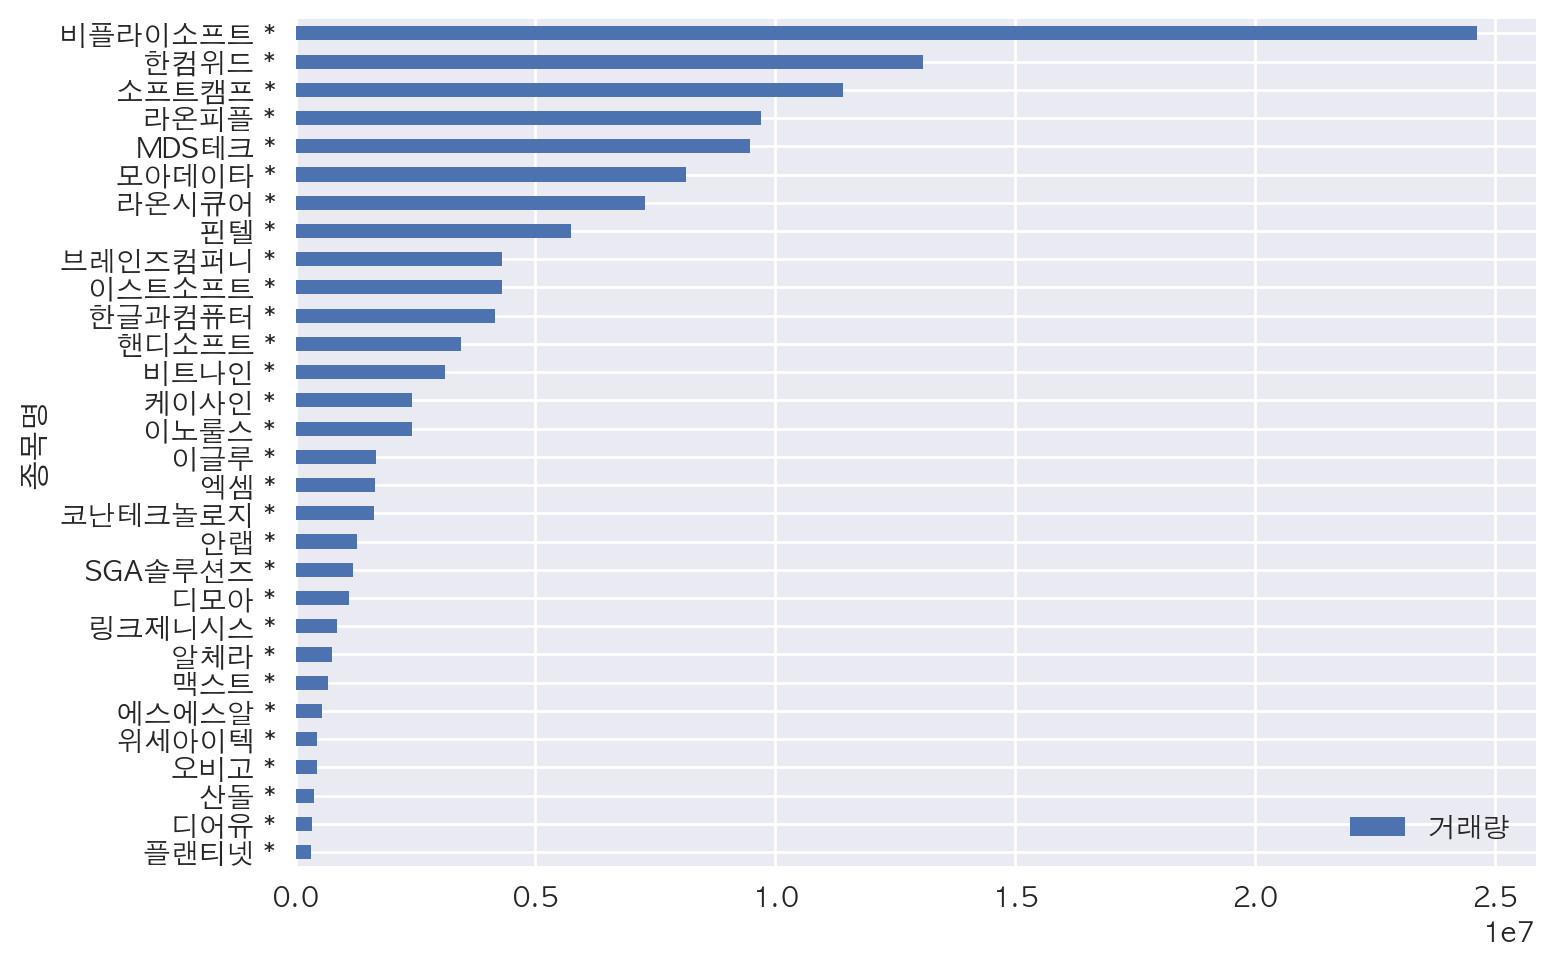

In [45]:
# 거래량과 거래대금 시각화
# 종목명 대비 거래량을 bar chart로 만들어보기
temp = data_detail[["종목명", "거래량"]].sort_values("거래량")
temp.set_index("종목명").tail(30).plot.barh()

<AxesSubplot:ylabel='종목명'>

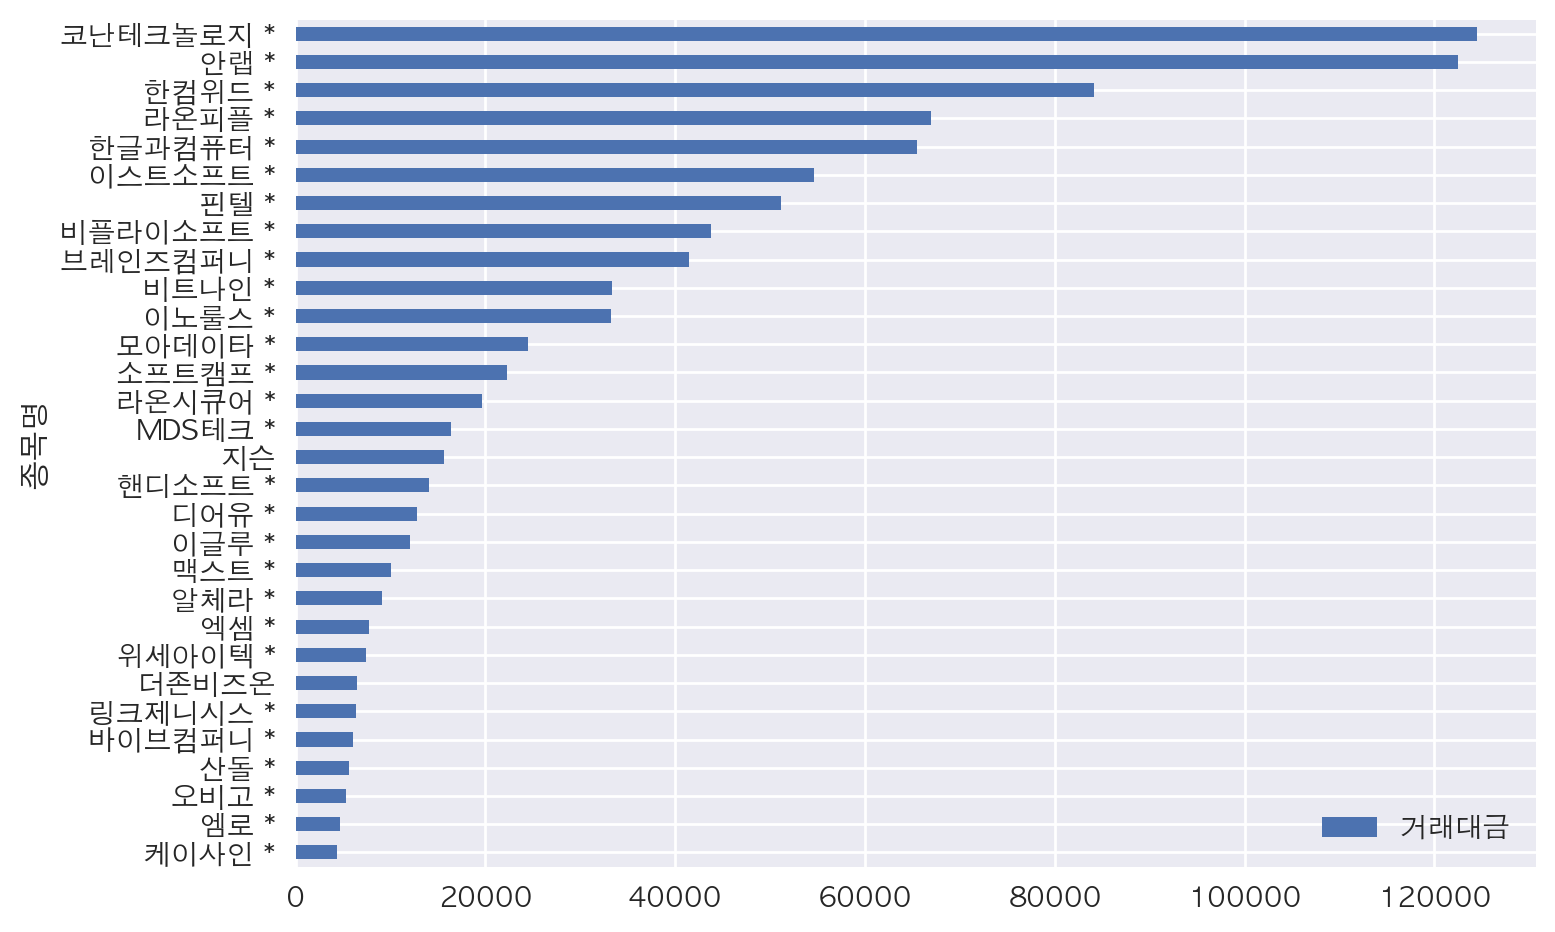

In [46]:
# 동일한 방법으로 거래대금 시각화
temp = data_detail[["종목명", "거래대금"]].set_index("종목명")
temp = temp.sort_values("거래대금").tail(30)
temp.plot.barh()